# Data Science I Topic 3.2 - Inferential Statistics

**Q1**

Explain briefly with your own words:

1. Type I and Type II errors
2. Level of significance $\alpha$
3. Region of rejection
4. $p$-value

Answer the following questions. Please search the necessary distribution tables or calculators yourselves. In the exam you are not expected to perform double summations so feel free to use nested loops or list comprehensions in the code cells whenever you think it's appropriate.

**Ans**

1. Type I error, a.k.a. false positive, is rejecting null hypothesis when it is true. <br> Type II error, a.k.a false negative, is not rejecting a null hypothesis when the alternative is true.
* Level of significance ($\alpha$) is the proportion of the area in a sampling distribution that equal the probability of Type I error.
* Region of rejection is the area of the sampling distribution that represents those values of the test statistic that are improbable when the null hypothesis is true.
* $p$-value is the degree of plausibility of the null hypothesis after the data have been observed. We accept the null hypothesis if the significance level is less than the $p$-value.

***

**Q2**
The weights of salmon grown at a commercial hatchery are normally distributed with a standard deviation of 0.6 kg. The hatchery claims that the mean weight of this year’s crop is **at least** 3.8 kg. Suppose a random sample of 16 fish yielded an average weight of 3.6 kg. Is this strong enough evidence to reject the hatchery’s claims at the 1 percent level of significance? What is the $p$-value?

**Ans**

$z$-test

$\sigma_W = 0.6$, $n=16$, $\bar{W}=3.6$ kg

Claim: mean weight is 3.8kg or more, so we can test the null hypothesis that the mean weight equal to 3.8kg, against the alternative that the mean weight is less than 3.8kg.

**Step 1** - state the hypotheses:

$H_0$ : $\mu_W = 3.8$ kg

$H_1$ : $\mu_W < 3.8$ kg

**Step 2** - find the critical value

$\alpha = 0.01$

$z_{\alpha} = -2.33$

**Step 3** - find the test statistic

$$ z= \frac{3.6 - 3.8}{0.6/\sqrt{16}} = -1.33$$

**Step 4** - conclude

Since -1.33>-2.33, we do not reject the null hypothesis, and therefore we accept the claim of the hatchery.

The $p$-value is .09176, which is >0.01, so the alternative hypothesis is not significant to reject the null hypothesis.

In [ ]:
from scipy.stats import t, norm, f

In [ ]:
norm.ppf(0.01)

-2.3263478740408408

In [ ]:
norm.cdf(-2.33)

0.009903075559164245

In [ ]:
norm.cdf(-1.33)

0.09175913565028077

***

**Q3**
The following data summary was obtained from a comparison of the lead content of human hair removed from adult individuals that had died between 1880 and 1920 with the lead content of present-day adults. The data are in units of micrograms, equal to one-millionth of a gram.

||1880–1920|Today|
|:-|:-:|:-:|
Sample size: | 30 | 100
Sample mean: | 48.5 | 26.6
Sample standard deviation: | 14.5 | 12.3

Do the above data establish, at the 1 percent level of significance, that the
mean lead content of human hair is less today than it was in the years between 1880 and 1920?

**Ans**

We are not given the variance relationship between the two populations, so we need to first test the equality of the variance => First $F$-test.

$X$ : lead content of human hair between 1880-1920
$Y$ : lead content of human hair of today

$\bar{X} = 48.5$, $\bar{Y}=26.6$
$s_X=14.5$, $s_Y=12.3$
$n=30$, $m=100$

$F$-test hypotheses:

$H_0$: $\sigma_X^2=\sigma_Y^2$

$H_1$: $\sigma_X^2 \neq \sigma_Y^2$

Test statistic:

$$F = \frac{s_X^2}{s_Y^2} = \frac{14.5^2}{12.3^2} \approx 1.39$$

Critical values
$F_{0.005, 29, 99}=0.42$
$F_{0.995, 29, 99}=2.04$

Accept that the two population variances are equal, since 1.39 is between 0.42 and 2.04

In [ ]:
f.ppf(0.005, 29, 99)

0.4240765208437128

In [ ]:
1/f.ppf(0.995, 99, 29)

0.42407652084371283

In [ ]:
f.ppf(0.995, 29, 99)

2.0411241741179342

So now we can test our main hypothesis.

Hypotheses:

$H_0$: $\mu_X = \mu_Y$

$H_1$: $\mu_Y < \mu_X$

Test statistic $$t=\frac{\left(\bar{x}-\bar{y}\right)}{s_{\bar{x}-\bar{y}}},$$

where $$s_{\bar{x}-\bar{y}}=\sqrt{s^{2}\left(\frac{1}{n}+\frac{1}{m}\right)}$$

and $$s^{2}=\frac{\left(n-1\right)s_{x}^{2}+\left(m-1\right)s_{y}^{2}}{n+m-2}$$

In [ ]:
s2 = (29*14.5**2 + 99*12.3**2)/128
s_xy = (s2 * (1/30 + 1/100))**0.5
t = (48.5 - 26.6)/s_xy
t

8.198882667599849

Test statistic $t \approx 8.2$
At $\alpha=0.01$, the critical value is 2.33. So we reject the null hypothesis and accept the claim that the lead content of human hair in 1880-1920 is higher than that of today.

***

**Q4**

The table contains a simplified dataset containing samples from 5 different methods. Can you conclude that different method may give different outcomes?
<img src="T3_2_Lp45.png" width="200">

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
from IPython.display import Image

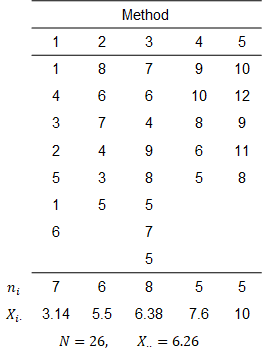

In [ ]:
Image("/content/T3_2_Lp45.png")

**Ans**

We use Anova with unequal sample sizes.

Hypotheses:

$H_0: \mu_1=\mu_2=\ldots=\mu_5$

(common mistake: $\sigma^2_1=\ldots=\sigma^2_m$)

$H_1$: not all the means are equal.

The test statistic is the $F$-statistic, $\mathrm{MS}_b / \mathrm{MS}_w$

In [ ]:
import numpy as np
X1 = np.array([1,4,3,2,5,1,6])
X2 = np.array([8,6,7,4,3,5])
X3 = np.array([7,6,4,9,8,5,7,5])
X4 = np.array([9,10,8,6,5])
X5 = np.array([10,12,9,11,8])
X = [X1, X2, X3, X4, X5]
X

[array([1, 4, 3, 2, 5, 1, 6]),
 array([8, 6, 7, 4, 3, 5]),
 array([7, 6, 4, 9, 8, 5, 7, 5]),
 array([ 9, 10,  8,  6,  5]),
 array([10, 12,  9, 11,  8])]

We need the quantities $$\bar{x}_{\cdot\cdot}=\frac{\sum_{i=1}^{m}\sum_{j=1}^{n_{i}}x_{ij}}{\sum_{i=1}^{m}n_{i}}$$

$$\bar{x}_{i\cdot}=\sum_{j=1}^{n_{i}}x_{ij}/n_{i}$$

In [ ]:
# _ indicates .
xi_ = [sum(x)/len(x) for x in X]

from pandas.core.common import flatten
x__ = np.mean(list(flatten(X)))

print(xi_)
print(x__)

[3.142857142857143, 5.5, 6.375, 7.6, 10.0]
6.258064516129032


Sum of squares between: $$\mathrm{SS}_{\mathrm{b}}=\sum_{i=1}^{m}n_{i}\left(\bar{x}_{i\cdot}-\bar{x}_{..}\right)^{2}$$

In [ ]:
ni = [len(x) for x in X]
ssb = sum( [nii*(xii-x__)**2 for nii, xii in zip(ni, xi_)] )
ssb

150.50334101382487

Sum of squares within: $$\mathrm{SS}_{\mathrm{w}}=\sum_{i=1}^{m} \sum_{j=1}^{n_i} \left(x_{ij}-\bar{x}_{i.}\right)^{2}$$

In [ ]:
m = 5
ssw = 0
for i in range(m):
    for j in range(ni[i]):
        ssw += (X[i][j] - xi_[i])**2

ssw

87.43214285714285

Mean square between $$\mathrm{MS}_{\mathrm{b}}=\mathrm{SS}_{\mathrm{b}}/\left(m-1\right)$$

Mean square within $$\mathrm{MS}_{\mathrm{w}}=\mathrm{SS}_{\mathrm{w}}/N, $$

where $N=\sum_{i}n_{i}-m$

In [ ]:
# Mean square between
msb = ssb/(m-1)

N = sum(ni) - m
# Mean square within
msw = ssw/N

print(msb)
print(msw)

37.625835253456216
3.362774725274725


In [ ]:
msb/msw

11.188925315353183

$F_{0.95,4,26}$ or $F_{0.05,4,26}$
Threshold: 2.74

In [ ]:
f.ppf(0.95, 4, 26)

2.7425941372218587

Conclusion: different method may give different outcomes

***
**Q5**

We want to test whether material, temperature, or the combination of a certain material and temperature affects the generator lifetime. The table below shows the generator lifetime (in months) for given materials and operational temperatures.
<img src="T3_2_Lp49.png" width="320">

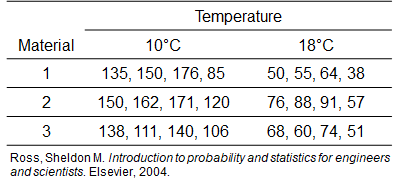

In [ ]:
Image("/content/T3_2_Lp49.png")

We use two-way Anova

* $i$: row index (different materials), $i=1,\ldots,m$, where $m=3$
* $j$: column index (different temperature), $j=1, \ldots, n$, where $n=2$
* $k$: sample index, $k=1,\ldots, l$, where $l=4$
* $N: nm(l-1)$

In [ ]:
m,n,l = 3,2,4
N = n*m*(l-1)

X = np.array([135, 150, 176, 85, 50, 55, 64, 38,
            150, 162, 171, 120, 76, 88, 91, 57,
            138, 111, 140, 106, 68, 60, 74, 51]).reshape(m,n,l)
X

array([[[135, 150, 176,  85],
        [ 50,  55,  64,  38]],

       [[150, 162, 171, 120],
        [ 76,  88,  91,  57]],

       [[138, 111, 140, 106],
        [ 68,  60,  74,  51]]])

In [ ]:
# _ indicates .
x___ = np.mean(X) # x...
x___

100.66666666666667

In [ ]:
xi__ = np.mean(X, (1,2)) #xi..
xi__

array([ 94.125, 114.375,  93.5  ])

In [ ]:
x_j_ = np.mean(X, (0,2)) #x.j.
x_j_

array([137.        ,  64.33333333])

$$\mathrm{SS}_{r}=l\cdot n\cdot\sum_{i=1}^{m}\left(\bar{x}_{i\cdot\cdot}-\bar{x}_{\cdots}\right)^{2}$$

In [ ]:
ssr = l*n*np.sum((xi__ - x___)**2)
ssr

2256.5833333333335

$$\mathrm{SS}_{c}=l\cdot m\cdot\sum_{j=1}^{n}\left(\bar{x}_{\cdot j\cdot}-\bar{x}_{\cdots}\right)^{2}$$

In [ ]:
ssc = l*m*np.sum((x_j_ - x___)**2)
ssc

31682.66666666667

In [ ]:
xij_ = np.mean(X, 2)
xij_

array([[136.5 ,  51.75],
       [150.75,  78.  ],
       [123.75,  63.25]])

$$\mathrm{SS}_{\text{int}}=l\cdot\sum_{j=1}^{n}\sum_{i=1}^{m}\left(\bar{x}_{ij\cdot}-\bar{x}_{i\cdot\cdot}-\bar{x}_{\cdot j\cdot}+\bar{x}_{\cdots}\right)^{2}$$

In [ ]:
ssint = 0
for j in range(n):
    for i in range(m): # 0 to 2  python indexing, 1 to 3 math notation
        ssint += (xij_[i,j] - xi__[i] - x_j_[j] + x___)**2
ssint = l*ssint
ssint

588.0833333333333

$$\mathrm{SS}_{e}=\sum_{k=1}^{l}\sum_{j=1}^{n}\sum_{i=1}^{m}\left(X_{ijk}-X_{ij\cdot}\right)^{2}$$

In [ ]:
sse = 0
for k in range(l):
    for j in range(n):
        for i in range(m):
            sse += (X[i,j,k] - xij_[i,j])**2
sse

8190.0

$$F_{r}=\frac{\mathrm{SS}_{r}/\left(m-1\right)}{\mathrm{SS}_{e}/N}$$

In [ ]:
Fr = ssr/sse/(m-1)*N
Fr

2.4797619047619053

$$F_{c}=\frac{\mathrm{SS}_{c}/\left(n-1\right)}{\mathrm{SS}_{e}/N}$$

In [ ]:
Fc = ssc/sse/(n-1)*N
Fc

69.63223443223444

$$F_{\text{int}}=\frac{\mathrm{SS}_{\text{int}}/\left(m-1\right)\left(n-1\right)}{\mathrm{SS}_{e}/N}$$

In [ ]:
Fint = ssint/sse/(m-1)/(n-1)*N
Fint

0.6462454212454212

In [ ]:
m,n,N

(3, 2, 18)

$F_{0.05,2,18}$ row critical val 3.55

$F_{0.05,1,18}$ column critical val 4.41

$F_{0.05,2,18}$ interaction 3.55

Temperature affects the generator lifetime.

***
**Q6**

Given the weekly number of accidents over a stretch of an Autobahn over a 30-week period:

8, 0, 0, 1, 3, 4, 0, 2, 12, 5, 1, 8, 0, 2, 0, 1, 9, 3, 4, 5, 3, 3, 4, 7, 4, 0, 1, 2, 1, 2

Test the hypothesis that the number of accidents in a week has a Poisson distribution. Let $Y$ be the random variable representing the weekly number of accidents, break up the possible values into $k$=5 regions as follow:
(1) $Y$=0, (2) $Y$=1, (3) $Y$=2 "or" 3, (4) $Y$=4 "or" 5, (5) $Y$>5.

In [ ]:
Y = [8, 0, 0, 1, 3, 4, 0, 2, 12, 5, 1, 8, 0, 2, 0, 1, 9, 3, 4, 5, 3, 3, 4, 7, 4, 0, 1, 2, 1, 2]
n = len(Y)
n

30

In [ ]:
# count occurences of the outcomes
print("outcome, #")
[[y, Y.count(y)] for y in set(Y)]

outcome, #


[[0, 6],
 [1, 5],
 [2, 4],
 [3, 4],
 [4, 4],
 [5, 2],
 [7, 1],
 [8, 2],
 [9, 1],
 [12, 1]]

Testing against a Poisson distribution

In [ ]:
# ML estimate lambda
lmb = np.mean(Y)
lmb

3.1666666666666665

In [ ]:
from scipy.stats import poisson
# Calculate the pmf estimates
# subscript shows the region number
p1 = poisson.pmf(0,lmb) #or apply Poisson pmf formula
p2 = poisson.pmf(1,lmb)
p3 = poisson.pmf(2,lmb)+poisson.pmf(3,lmb)
p4 = poisson.pmf(4,lmb)+poisson.pmf(5,lmb)
p5 = 1-(p1+p2+p3+p4)

p = (p1,p2,p3,p4,p5)
p

(0.042143843509276406,
 0.13345550444604193,
 0.4343482390072567,
 0.28840788287535146,
 0.10164453016207353)

$$T=\sum_{i}\frac{\left(X_{i}-n\hat{p}_{i}\right)^{2}}{n\hat{p}_{i}}$$

In [ ]:
X = [6,5,8,6,5]
sum([ (xi-n*pi)**2/(n*pi) for xi,pi in zip(X,p)])

21.989042229344893

$H_0$: the number of accidents in a week in an autobahn follows a Poisson distribution
k=5, m=1
k-1-1
critical value 7.8

Conclusion: Reject $H_0$ $\Rightarrow$ the number of accidents in a week in an autobahn does not follow a Poisson distribution

In [ ]:
from scipy.stats import chi2
chi2.ppf(0.95, 3)

7.814727903251179